In [1]:
import numpy as np
import matplotlib.pyplot as plt
import usphere_utils as uu

/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_20123/2585171935.py:22: RuntimeWarning: invalid value encountered in sqrt
  Enu = np.sqrt( (Q-Te)**2 - mnu**2 )
/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_20123/2585171935.py:23: RuntimeWarning: invalid value encountered in sqrt
  pnu = np.sqrt( Enu**2 - mnu**2)


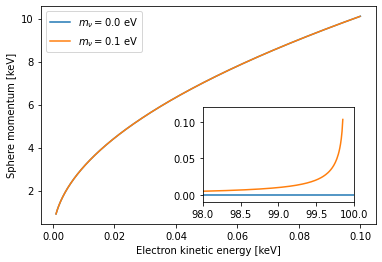

In [72]:
## Make a plot of the 2d distribution of nucleus recoil 
## momentum versus electron kinetic energy for a beta emitter with Q = 100 eV

Q = 0.1 ## keV
A, Z = 100, 45 ## magical isotope
me = 511 ## electron mass (keV)

Te = np.linspace(1e-3,Q,10000) ## electron kinetic energy (keV)

keV_to_eV = 1e3

max_p = np.sqrt(2*me*Q)

plt.figure()
## loop over nu mass
ax = plt.gca()
axins = plt.axes((0.5, 0.2, 0.35, 0.33))
for mnu in [0, 0.1e-3]: #, 1e-3]: 
    dNdTe = uu.simple_beta_nonrel(Te, Q, mnu, A, Z)
    
    ## now find the neutrino energy (note that the nucleus energy is always negligible, <meV for this case)
    Enu = np.sqrt( (Q-Te)**2 - mnu**2 )
    pnu = np.sqrt( Enu**2 - mnu**2)

    ## electron momentum
    pe = np.sqrt( (Te + me)**2 - me**2 )

    ## sphere momentum (assume e and nu back to back by angular momentum conservation)
    psph = pe - pnu

    if(mnu == 0):
        light_p = psph

    ax.plot(Te, psph, label=r"$m_\nu = %.1f$ eV"%(mnu*keV_to_eV))
    axins.plot(Te*keV_to_eV, (psph-light_p)*keV_to_eV)

#plt.xlim(Q*keV_to_eV - 1, Q*keV_to_eV)

axins.set_xlim(98, 100)
axins.set_ylim(-0.01, 0.12)
axins.set_ylabel("Diff to massless [eV]")
axins.set_ylabel("$T_e$ [eV]")

ax.set_ylabel("Sphere momentum [keV]")
ax.set_xlabel("Electron kinetic energy [keV]")
ax.legend(loc='upper left')
plt.show()